In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import datetime

import matplotlib as mpl
fp = mpl.font_manager.FontProperties(family='Tahoma',size=13)

%matplotlib inline

In [2]:
#df = pd.read_csv('chaiyo_encode_data.csv', index_col=0)
df = pd.read_csv('chaiyo_clean_90_v2.csv', index_col=0)
df

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,age,Vehicle Age
0,199000.0,199000.00,60,F,STREET VENDOR,20000.0,PU,NISSAN,FRONTIER NAVARA,2012,AD,283500,S1,2022-11-14,S1,PL,44,11
1,60000.0,58822.04,36,M,อื่นๆ,14000.0,CAR,TOYOTA,COROLLA ALTIS,2002,AJ,111000,S1,2022-09-06,S1,PL,53,21
2,36000.0,35904.37,24,F,พนักงานบริษัท,15000.0,MC,HONDA,CLICK 150I,2019,BH,48500,S1,2022-12-30,S2,PL,32,4
3,30000.0,28813.69,24,F,เกษตรกร,35000.0,MC,HONDA,PCX 150,2020,ED,76500,S1,2022-11-12,S1,PL,37,3
4,200000.0,200000.00,36,M,พนักงานบริษัท,40000.0,PU,ISUZU,D-MAX,2013,BU,414500,S1,2022-12-29,S1,PL,57,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,14000.0,14000.00,12,F,STREET VENDOR,15000.0,MC,YAMAHA,FINO (MLEKE),2009,AH,23000,S3,2022-12-24,S2,NPL,67,14
4025,45000.0,45000.00,18,F,พนักงานบริษัท,40000.0,MC,HONDA,PCX 150,2017,CQ,61500,S3,2022-12-27,S2,NPL,35,6
4027,144000.0,144000.00,60,M,ข้าราชการ,36000.0,CAR,TOYOTA,VIOS,2010,DX,222000,S3,2022-12-29,S2,NPL,54,13
4029,39000.0,39000.00,36,F,พนักงานบริษัท,15000.0,MC,HONDA,DREAM 110I,2017,CO,53000,S3,2022-12-29,S2,NPL,35,6


In [3]:
df[df['DPD']=='PL'].shape

(3355, 18)

In [4]:
df[df['DPD']=='NPL'].shape

(55, 18)

In [5]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Occupation Description','Collateral Type Code','Vehicle Brand','Vehicle Model','System CAR Code (Daily)','Final CAR Code Previous Month']

le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 0 to 4030
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Principal Approve Amount       3410 non-null   float64
 1   Principal Amount               3410 non-null   float64
 2   Repayment Tenor Month Number   3410 non-null   int64  
 3   Gender                         3410 non-null   int32  
 4   Occupation Description         3410 non-null   int32  
 5   Total Income Amount (Month)    3410 non-null   float64
 6   Collateral Type Code           3410 non-null   int32  
 7   Vehicle Brand                  3410 non-null   int32  
 8   Vehicle Model                  3410 non-null   int32  
 9   Vehicle Release Year           3410 non-null   int64  
 10  Vehicle Sub Model              3410 non-null   object 
 11  Evaluation Amount              3410 non-null   int64  
 12  System CAR Code (Daily)        3410 non-null   i

In [7]:
df.describe()

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,age,Vehicle Age
count,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000,3410.000000
mean,75629.661883,74669.248630,36.554252,0.448680,6.173021,19168.366824,1.032845,10.145455,122.117302,2012.750733,120642.873900,0.287390,0.097361,41.233431,10.249267
std,79271.468921,79109.897565,16.228752,0.497432,3.873397,7843.535265,0.658077,7.027329,65.157838,5.321909,122898.834079,0.514489,0.301398,10.708876,5.321909
min,3000.000000,1583.590000,12.000000,0.000000,0.000000,6500.000000,0.000000,0.000000,0.000000,1990.000000,10000.000000,0.000000,0.000000,21.000000,1.000000
25%,22525.000000,21643.710000,24.000000,0.000000,2.000000,13500.000000,1.000000,5.000000,56.000000,2009.000000,35000.000000,0.000000,0.000000,33.000000,6.000000
50%,30000.000000,29975.925000,36.000000,0.000000,5.000000,18000.000000,1.000000,5.000000,133.500000,2013.000000,44000.000000,0.000000,0.000000,40.000000,10.000000
75%,125750.000000,124864.205000,60.000000,1.000000,10.000000,24805.000000,1.000000,20.000000,191.000000,2017.000000,209375.000000,1.000000,0.000000,49.000000,14.000000
max,314000.000000,314000.000000,60.000000,1.000000,12.000000,41308.000000,4.000000,22.000000,209.000000,2022.000000,831000.000000,2.000000,2.000000,72.000000,33.000000


In [8]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,age,Vehicle Age
count,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.0,3410.00,3410.00
mean,75629.66,74669.25,36.55,0.45,6.17,19168.37,1.03,10.15,122.12,2012.75,120642.87,0.29,0.1,41.23,10.25
std,79271.47,79109.90,16.23,0.50,3.87,7843.54,0.66,7.03,65.16,5.32,122898.83,0.51,0.3,10.71,5.32
min,3000.00,1583.59,12.00,0.00,0.00,6500.00,0.00,0.00,0.00,1990.00,10000.00,0.00,0.0,21.00,1.00
25%,22525.00,21643.71,24.00,0.00,2.00,13500.00,1.00,5.00,56.00,2009.00,35000.00,0.00,0.0,33.00,6.00
50%,30000.00,29975.93,36.00,0.00,5.00,18000.00,1.00,5.00,133.50,2013.00,44000.00,0.00,0.0,40.00,10.00
75%,125750.00,124864.20,60.00,1.00,10.00,24805.00,1.00,20.00,191.00,2017.00,209375.00,1.00,0.0,49.00,14.00
max,314000.00,314000.00,60.00,1.00,12.00,41308.00,4.00,22.00,209.00,2022.00,831000.00,2.00,2.0,72.00,33.00


In [9]:
df.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model',
       'Evaluation Amount', 'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'age', 'Vehicle Age'],
      dtype='object')

In [10]:
df.head(5)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Vehicle Sub Model,Evaluation Amount,System CAR Code (Daily),System CAR Code Date,Final CAR Code Previous Month,DPD,age,Vehicle Age
0,199000.0,199000.00,60,0,1,20000.0,2,14,79,2012,AD,283500,0,2022-11-14,0,PL,44,11
1,60000.0,58822.04,36,1,10,14000.0,0,20,40,2002,AJ,111000,0,2022-09-06,0,PL,53,21
2,36000.0,35904.37,24,0,5,15000.0,1,5,34,2019,BH,48500,0,2022-12-30,1,PL,32,4
3,30000.0,28813.69,24,0,11,35000.0,1,5,134,2020,ED,76500,0,2022-11-12,0,PL,37,3
4,200000.0,200000.00,36,1,5,40000.0,2,7,50,2013,BU,414500,0,2022-12-29,0,PL,57,10


In [11]:
df.describe().round(2)

,Principal Approve Amount,Principal Amount,Repayment Tenor Month Number,Gender,Occupation Description,Total Income Amount (Month),Collateral Type Code,Vehicle Brand,Vehicle Model,Vehicle Release Year,Evaluation Amount,System CAR Code (Daily),Final CAR Code Previous Month,age,Vehicle Age
count,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.00,3410.0,3410.00,3410.00
mean,75629.66,74669.25,36.55,0.45,6.17,19168.37,1.03,10.15,122.12,2012.75,120642.87,0.29,0.1,41.23,10.25
std,79271.47,79109.90,16.23,0.50,3.87,7843.54,0.66,7.03,65.16,5.32,122898.83,0.51,0.3,10.71,5.32
min,3000.00,1583.59,12.00,0.00,0.00,6500.00,0.00,0.00,0.00,1990.00,10000.00,0.00,0.0,21.00,1.00
25%,22525.00,21643.71,24.00,0.00,2.00,13500.00,1.00,5.00,56.00,2009.00,35000.00,0.00,0.0,33.00,6.00
50%,30000.00,29975.93,36.00,0.00,5.00,18000.00,1.00,5.00,133.50,2013.00,44000.00,0.00,0.0,40.00,10.00
75%,125750.00,124864.20,60.00,1.00,10.00,24805.00,1.00,20.00,191.00,2017.00,209375.00,1.00,0.0,49.00,14.00
max,314000.00,314000.00,60.00,1.00,12.00,41308.00,4.00,22.00,209.00,2022.00,831000.00,2.00,2.0,72.00,33.00


In [12]:
#sns.pairplot(df, hue="DPD")

<Figure size 1500x1000 with 0 Axes>

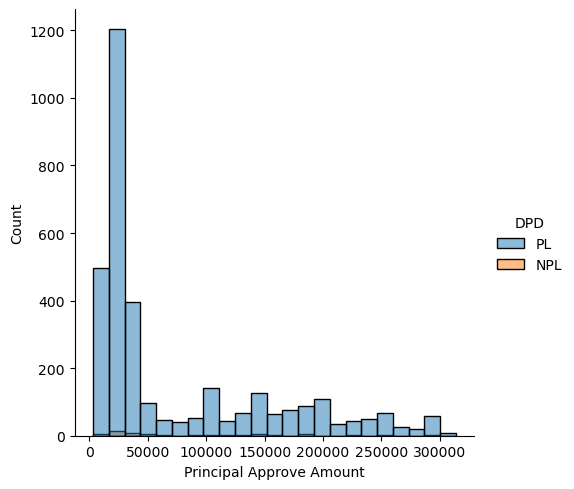

In [13]:
plt.figure(figsize=(15,10))
sns.displot(data=df, x="Principal Approve Amount", hue="DPD")

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Principal Approve Amount', ylabel='Density'>

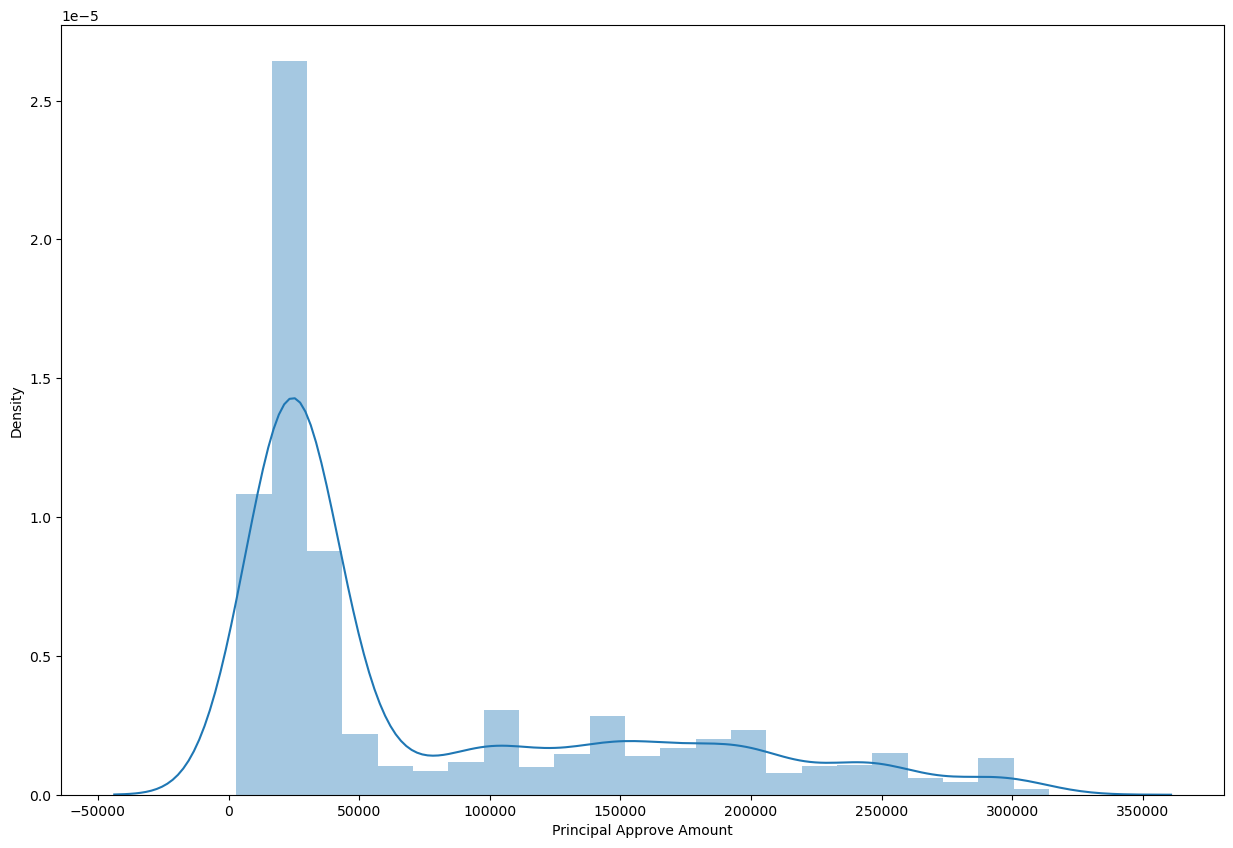

In [14]:
plt.figure(figsize=(15,10))
sns.distplot(df['Principal Approve Amount'])

In [15]:
# plt.figure(figsize=(15,10))
# sns.heatmap(df.corr(),annot=True, cmap="BuPu")

In [16]:
df.columns

Index(['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Model', 'Vehicle Release Year', 'Vehicle Sub Model',
       'Evaluation Amount', 'System CAR Code (Daily)', 'System CAR Code Date',
       'Final CAR Code Previous Month', 'DPD', 'age', 'Vehicle Age'],
      dtype='object')

In [17]:
cols = df[['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Model','Vehicle Release Year',
       'Evaluation Amount','age', 'Vehicle Age']]

In [18]:


X = cols
       # test approve กับ ที่ปล่อย
X2 = df[['Principal Approve Amount', 'Principal Amount',
       'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Vehicle Release Year', 'age', 'Vehicle Age']]
y = df['DPD']

# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [39]:
X_train.shape

(2046, 12)

In [40]:
X_test.shape

(1364, 12)

In [41]:
y_train.shape

(2046,)

In [42]:
y_test.shape

(1364,)

In [43]:
df[df['DPD']=='PL'].shape

(3355, 18)

In [44]:
df[df['DPD']=='NPL'].shape

(55, 18)

In [45]:
y_train.value_counts()

PL     2003
NPL      43
Name: DPD, dtype: int64

In [46]:
df.shape

(3410, 18)

# Imbalance Oversampling and Undersampling SMOTE

In [47]:
#pip install imblearn

In [48]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [49]:
#Fitting SMOTE to the train set
smote = SMOTE(random_state=101)
smote_X_train, smote_y_train = smote.fit_resample(X_train, y_train)

In [50]:
print('Before sampling class distribution : ', Counter(y_train))
print('After sampling class distribution : ', Counter(smote_y_train))

Before sampling class distribution :  Counter({'PL': 2003, 'NPL': 43})
After sampling class distribution :  Counter({'PL': 2003, 'NPL': 2003})


In [51]:
smote_X_train.shape

(4006, 12)

In [52]:
smote_y_train.shape

(4006,)

In [53]:
smote_y_train.value_counts()

PL     2003
NPL    2003
Name: DPD, dtype: int64

In [54]:
y_test.value_counts()

PL     1352
NPL      12
Name: DPD, dtype: int64

## Feature Importance Decisiontree

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model=DecisionTreeClassifier(criterion='entropy')

model.fit(smote_X_train, smote_y_train)

DecisionTreeClassifier(criterion='entropy')

In [56]:
X = cols
       # test approve กับ ที่ปล่อย
y = df['DPD']

In [57]:
model.feature_importances_

array([0.07241624, 0.04050164, 0.01554974, 0.10137104, 0.16003975,
       0.00796815, 0.07319677, 0.20534187, 0.03161732, 0.1628205 ,
       0.06567542, 0.06350156])

In [58]:
fs = pd.Series(model.feature_importances_, index=smote_X_train.columns).sort_values(
    ascending=False
)
fs

Vehicle Model                   0.205342
Evaluation Amount               0.162820
Total Income Amount (Month)     0.160040
Occupation Description          0.101371
Vehicle Brand                   0.073197
Principal Approve Amount        0.072416
age                             0.065675
Vehicle Age                     0.063502
Repayment Tenor Month Number    0.040502
Vehicle Release Year            0.031617
Gender                          0.015550
Collateral Type Code            0.007968
dtype: float64

In [59]:
fs.sum()

1.0000000000000002

<AxesSubplot:>

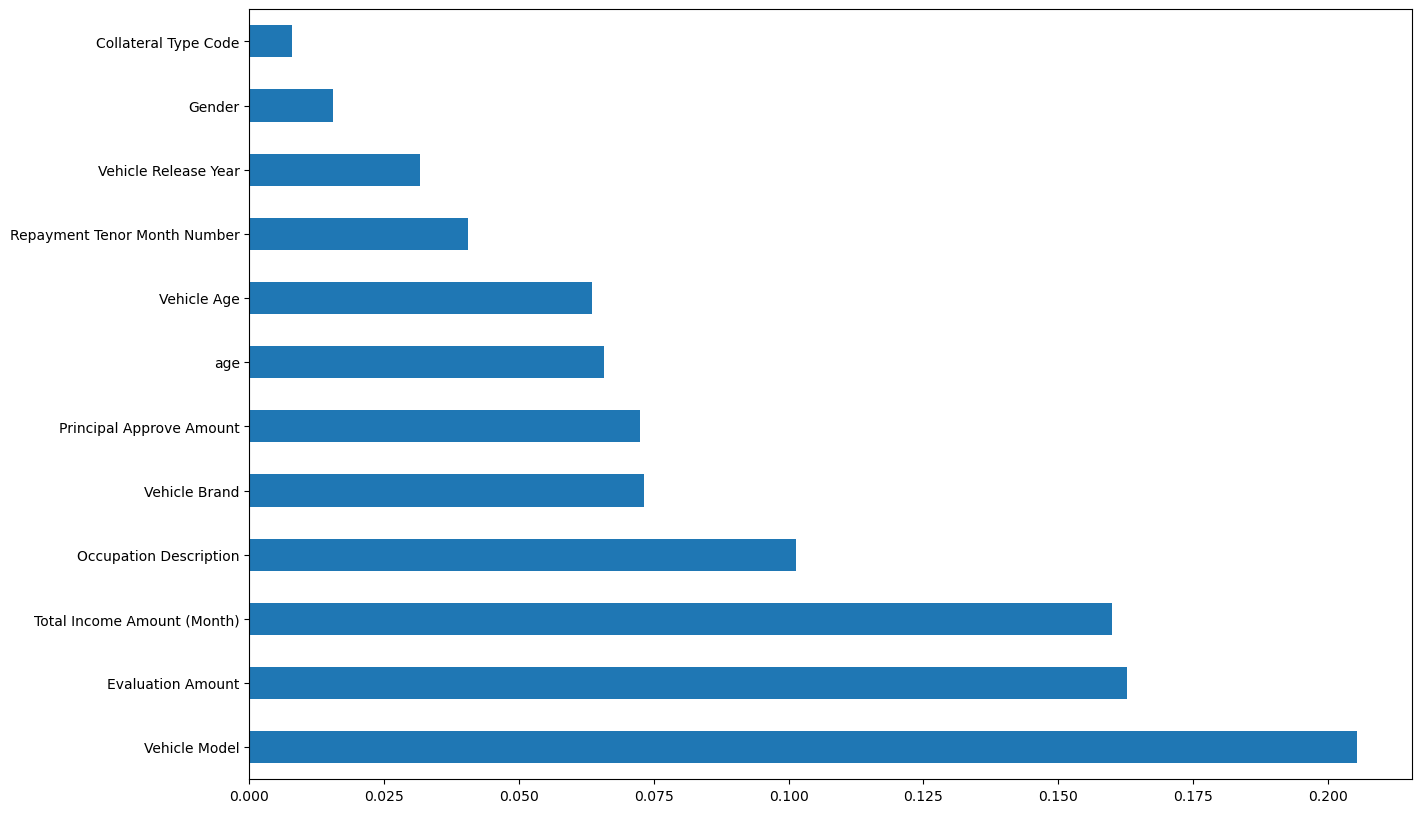

In [60]:
plt.figure(figsize=(15,10))
fs.plot(kind='barh')

# Cross Validation

In [61]:
# from sklearn.model_selection import cross_val_score
# def classify(model, x,y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
#     model.fit(X_train, y_train)
#     print("Accuracy is : ", model.score(X_test, y_test)*100)
#     #Cross Calidation
#     #eg: cv-5, train-4, test-1
#     score = cross_val_score(model, X, y, cv=10)
#     print(score)
#     print("Cross Validation is ", np.mean(score)*100)

In [64]:
from sklearn.model_selection import cross_val_score
def classify(model, x,y):
    smote_X_train, X_test, smote_y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    model.fit(smote_X_train, smote_y_train)
    print("Accuracy is : ", model.score(X_test, y_test)*100)
    #Cross Calidation
    #eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=10)
    print(score)
    print("Cross Validation is ", np.mean(score)*100)
    print("Cross Validation is ", np.std(score)*100)
    return model

In [65]:
# from sklearn.model_selection import cross_val_score,KFold
# from sklearn.linear_model import LogisticRegression

# logreg=LogisticRegression()
# kf=KFold(n_splits=5)
# score=cross_val_score(logreg,X,y,cv=kf)
# print("Cross Validation Scores are {}".format(score))
# print("Average Cross Validation score :{}".format(score.mean()*100))

In [66]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression

# # # Example data:
# # data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# # target = np.array([0, 0, 0, 1, 1, 1])

# # Define the KFold object
# kfold = KFold(n_splits=3, shuffle=True, random_state=0)

# # Initialize the Logistic Regression model
# model = LogisticRegression()

# # Store the results of cross-validation
# results = []
# for train_index, test_index in kfold.split(X):
# X_train, X_test = X[train_index], X[test_index]
# y_train, y_test = y[train_index], y[test_index]

# model.fit(X_train.reshape(-1, 1), y_train)
# score = model.score(X_test.reshape(-1, 1), y_test)
# results.append(score)

# # Average performance across all folds
# avg_result = np.mean(results)
# print("Average accuracy: {:.2f}".format(avg_result))

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
cv_lr = classify(model,X,y)

Accuracy is :  99.31573802541544
[0.98533724 0.98533724 0.98533724 0.98533724 0.98533724 0.98240469
 0.98240469 0.98240469 0.98240469 0.98240469]
Cross Validation is  98.38709677419354
Cross Validation is  0.14662756598240456


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
cv_dt = classify(model,X,y)

Accuracy is :  97.65395894428153
[0.96187683 0.96774194 0.96187683 0.96187683 0.95894428 0.96187683
 0.95894428 0.96480938 0.96480938 0.95601173]
Cross Validation is  96.1876832844575
Cross Validation is  0.32124490176256043


In [69]:
# sum(cv_dt.predict(X) == y)

In [70]:
# pd.crosstab(y, cv_dt.predict(X))

In [71]:
# 424/(424+54)

In [72]:
# 424/(424+68)

In [73]:
# len(y)

## DecisionTree

In [74]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
classifier = model.fit(smote_X_train,smote_y_train)
classifier

DecisionTreeClassifier(criterion='entropy')

In [75]:
#prediction
y_pred = classifier.predict(X_test)

from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation is ", np.mean(score)*100)

Accuracy Score: 91.56891495601172
[0.94721408 0.96480938 0.97067449 0.95894428 0.96480938 0.97067449
 0.95601173 0.96480938 0.96187683 0.95601173]
Cross Validation is  96.15835777126101


In [76]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   1   11]
 [ 104 1248]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.01      0.08      0.02        12
          PL       0.99      0.92      0.96      1352

    accuracy                           0.92      1364
   macro avg       0.50      0.50      0.49      1364
weighted avg       0.98      0.92      0.95      1364



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


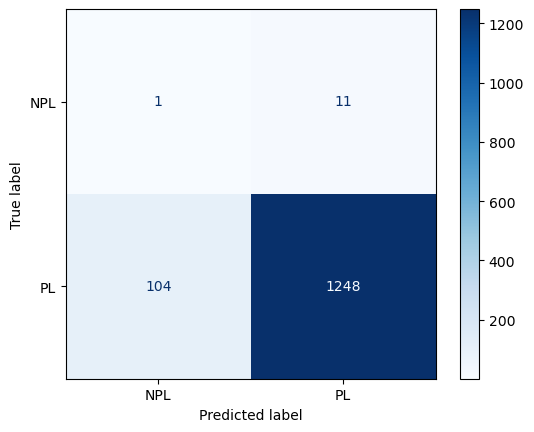

In [77]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


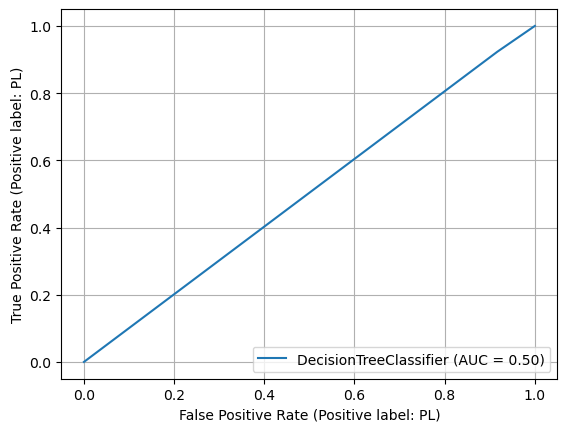

In [78]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

### Prunning

In [79]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=5)
#Predict the response for test dataset
classifier = classifier.fit(smote_X_train, smote_y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation is ", np.mean(score)*100)

Accuracy: 55.13196480938416
[0.95014663 0.95894428 0.97360704 0.95894428 0.95307918 0.96187683
 0.95894428 0.96480938 0.96187683 0.95601173]
Cross Validation is  95.9824046920821


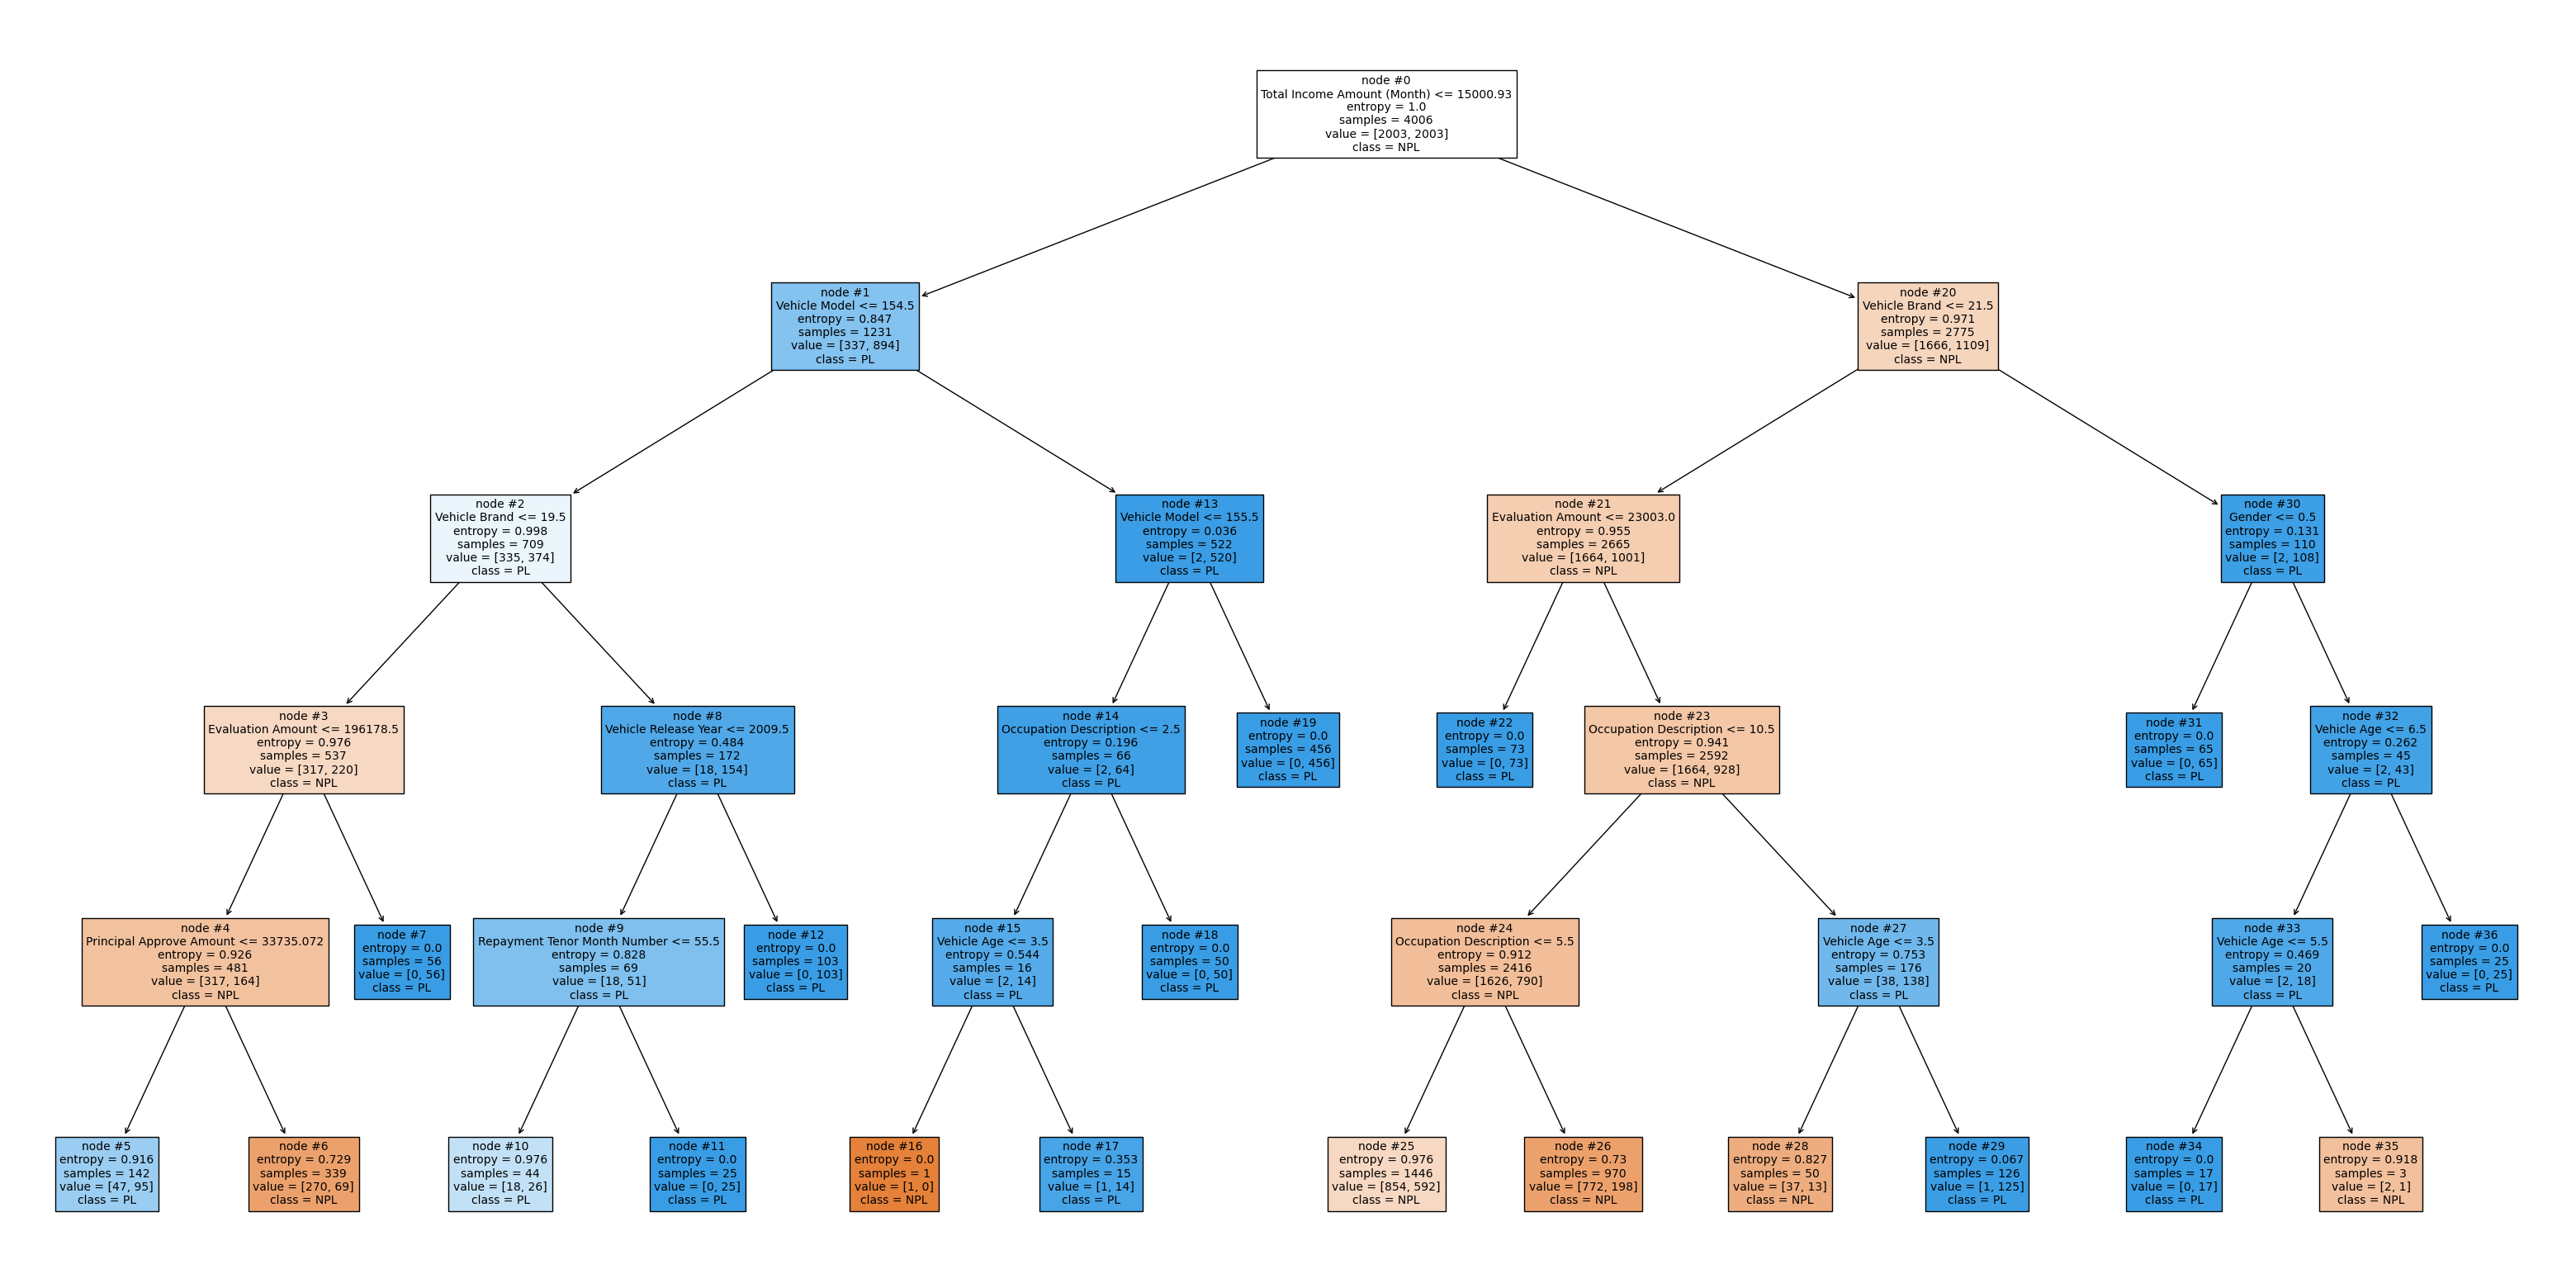

In [80]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Model','Vehicle Release Year',
       'Evaluation Amount','age', 'Vehicle Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [81]:
import graphviz

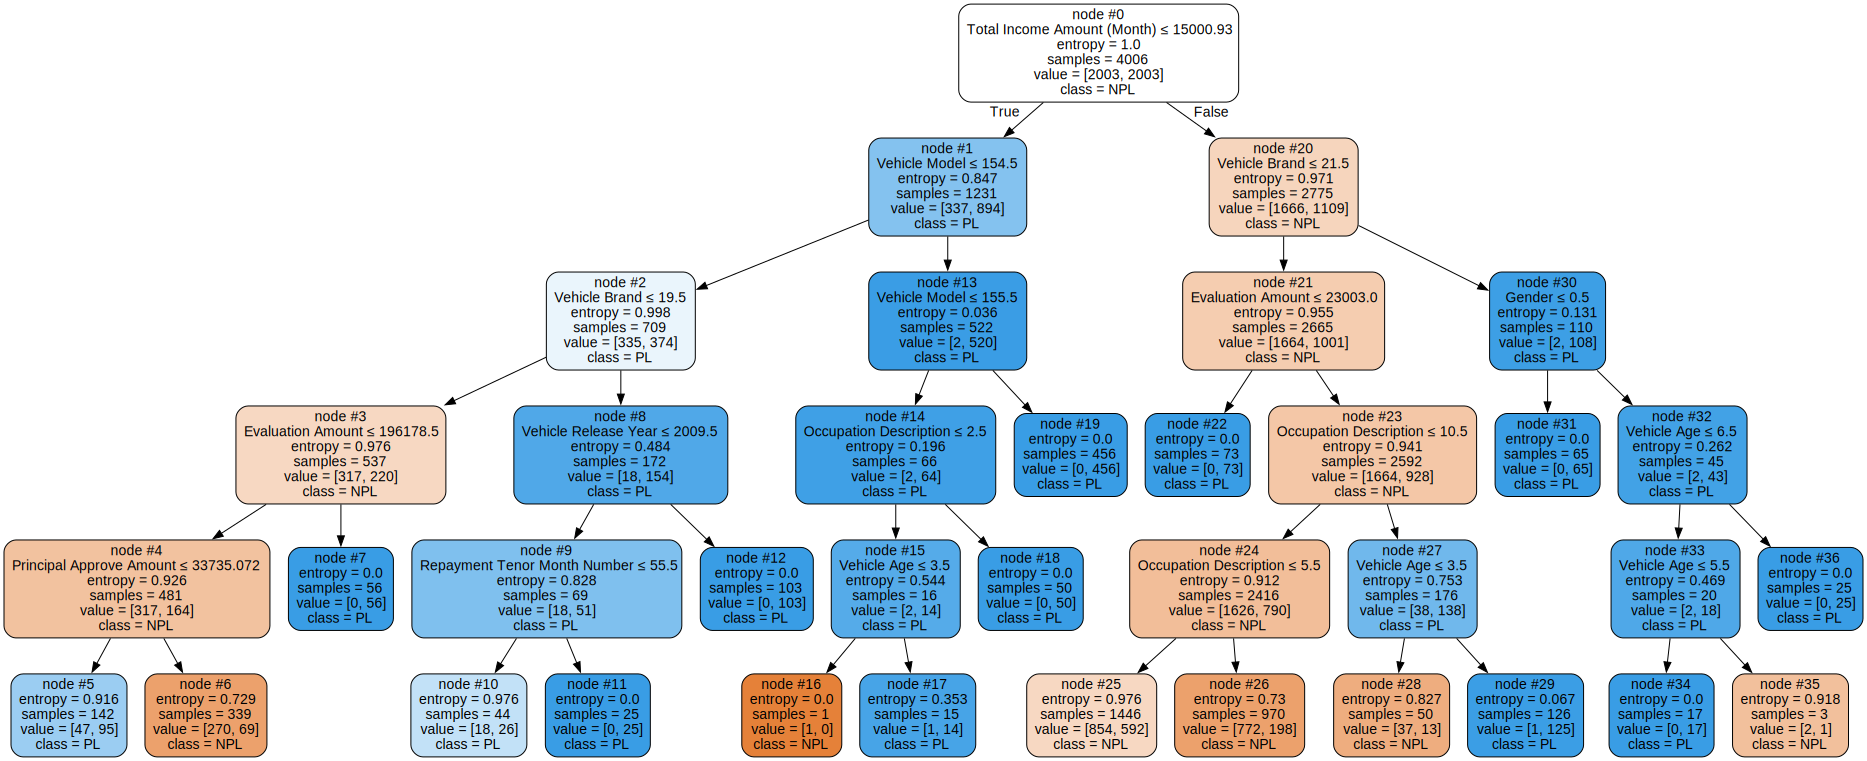

In [82]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand','Vehicle Model','Vehicle Release Year',
       'Evaluation Amount','age', 'Vehicle Age'],  
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Confusion Metric and Classification report

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  6   6]
 [606 746]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.01      0.50      0.02        12
          PL       0.99      0.55      0.71      1352

    accuracy                           0.55      1364
   macro avg       0.50      0.53      0.36      1364
weighted avg       0.98      0.55      0.70      1364



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


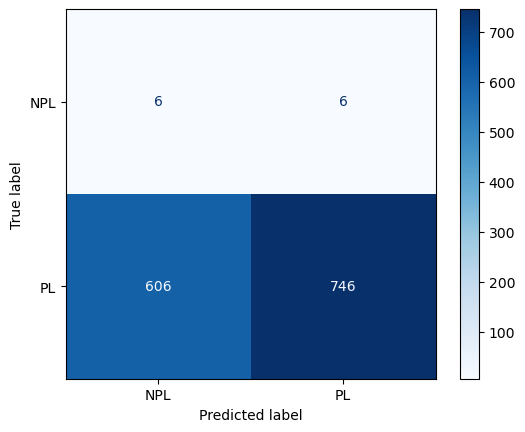

In [84]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


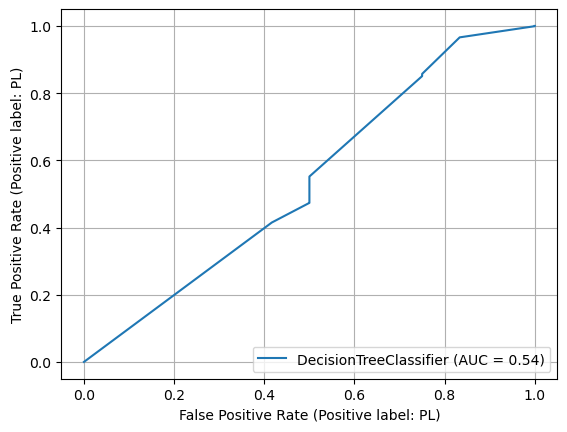

In [85]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

## Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, random_state=101)
classifier = model.fit(smote_X_train,smote_y_train)
classifier

RandomForestClassifier(n_estimators=250, random_state=101)

In [87]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation is ", np.mean(score)*100)

Accuracy Score: 98.38709677419355
[0.98533724 0.98533724 0.98533724 0.98533724 0.98533724 0.98240469
 0.98240469 0.98240469 0.98240469 0.98240469]
Cross Validation is  98.38709677419354


In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   2   10]
 [  12 1340]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.14      0.17      0.15        12
          PL       0.99      0.99      0.99      1352

    accuracy                           0.98      1364
   macro avg       0.57      0.58      0.57      1364
weighted avg       0.99      0.98      0.98      1364



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


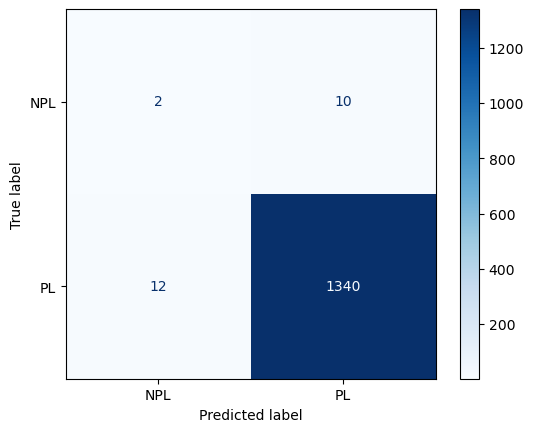

In [89]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


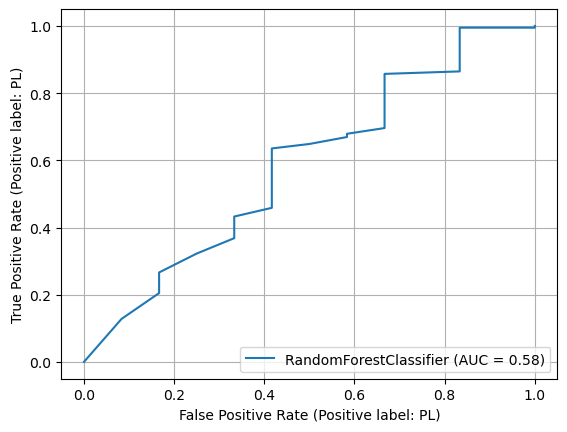

In [90]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

## ExtraTreesClassifier

In [91]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = ExtraTreesClassifier()
classifier = model.fit(smote_X_train,smote_y_train)
classifier

ExtraTreesClassifier()

In [92]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation is ", np.mean(score)*100)

Accuracy Score: 98.24046920821115
[0.98533724 0.98533724 0.98533724 0.98533724 0.98240469 0.97947214
 0.98240469 0.98240469 0.98240469 0.97653959]
Cross Validation is  98.26979472140764


In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[   2   10]
 [  14 1338]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.12      0.17      0.14        12
          PL       0.99      0.99      0.99      1352

    accuracy                           0.98      1364
   macro avg       0.56      0.58      0.57      1364
weighted avg       0.98      0.98      0.98      1364



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


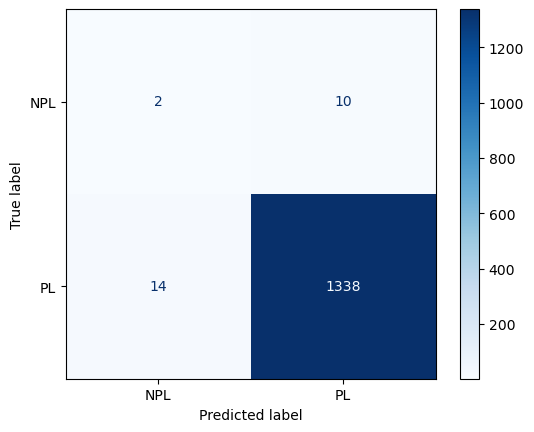

In [94]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


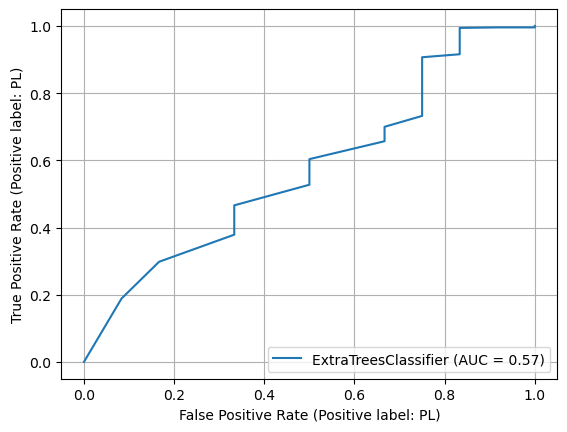

In [95]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

## Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classifier = model.fit(smote_X_train,smote_y_train)
classifier

LogisticRegression()

In [97]:
#prediction
y_pred = classifier.predict(X_test)
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

score = cross_val_score(model, X, y, cv=10)
print(score)
print("Cross Validation is ", np.mean(score)*100)

Accuracy Score: 65.10263929618768
[0.98533724 0.98533724 0.98533724 0.98533724 0.98533724 0.98240469
 0.98240469 0.98240469 0.98240469 0.98240469]
Cross Validation is  98.38709677419354


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

Confusion matrix : 
 [[  5   7]
 [469 883]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.01      0.42      0.02        12
          PL       0.99      0.65      0.79      1352

    accuracy                           0.65      1364
   macro avg       0.50      0.53      0.40      1364
weighted avg       0.98      0.65      0.78      1364



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


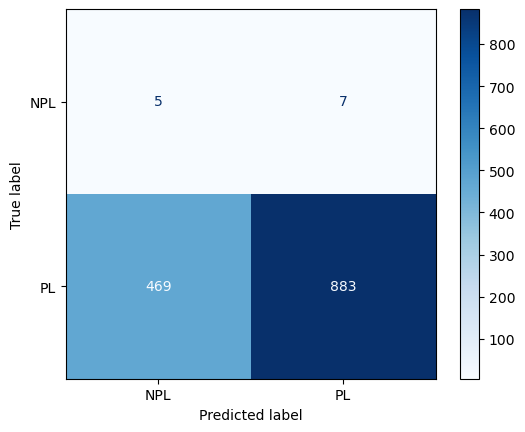

In [99]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


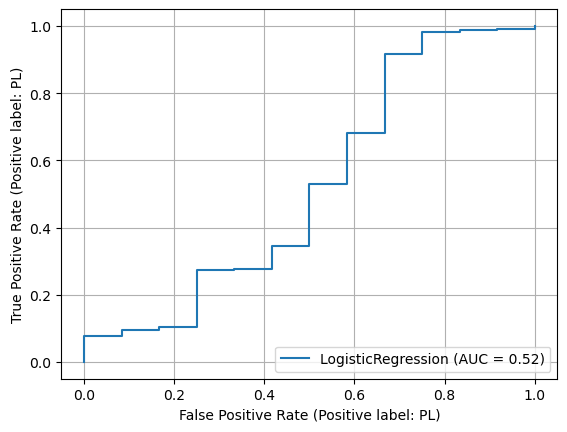

In [100]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()

## SVM

In [101]:
# from sklearn import svm
# model = svm.SVC(kernel='linear')
# classifier = model.fit(X_train,y_train)
# classifier

In [130]:
# #prediction
# y_pred = classifier.predict(X_test)
# from sklearn import metrics
# #Accuracy
# print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred)*100)

# score = cross_val_score(model, X, y, cv=10)
# print(score)
# print("Cross Validation is ", np.mean(score)*100)

In [131]:
# from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
# plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

# MinMax Scaler

In [132]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# print(scaler.fit_transform(X_train)[:5])
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
# X_train

# Evaluation with StartfieldKFold

In [133]:
#pip install KFold

In [134]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.datasets import load_breast_cancer
# from sklearn.metrics import accuracy_score

# #
# kfold = KFold(n_splits=10, shuffle=True, random_state=0)
# kfold

In [135]:

#kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [136]:
#model = LogisticRegression()

In [137]:
# results = []
# for train_index, test_index in kfold.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     print(X_train)
#     y_train, y_test = y[train_index], y[test_index]
    

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
ldf = RandomForestClassifier(n_estimators=250, random_state=101)

classifier = ldf.fit(X_train,y_train)

## Predictions

In [140]:
predictions = classifier.predict(X_test)

In [141]:
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, predictions)*100)

Accuracy Score: 61.794871794871796


In [142]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, predictions)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, predictions)
print('Classification report  \n',cr)

Confusion matrix : 
 [[ 52  86]
 [ 63 189]]
Classification report  
               precision    recall  f1-score   support

         NPL       0.45      0.38      0.41       138
          PL       0.69      0.75      0.72       252

    accuracy                           0.62       390
   macro avg       0.57      0.56      0.56       390
weighted avg       0.60      0.62      0.61       390



# Decision Tree

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [144]:
dct = DecisionTreeClassifier(criterion='entropy')
classifier = dct.fit(X_train,y_train)

## Predictions

In [145]:
predictions = classifier.predict(X_test)

In [146]:
from sklearn import metrics
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test, predictions)*100)

Accuracy Score: 58.97435897435898


## Prunning

In [147]:
# Create Decision Tree classifer object
# Train Decision Tree Classifer
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)
#Predict the response for test dataset
classifier = classifier.fit(X_train, y_train)
# Model Accuracy, how often is the classifier correct?
y_pred = classifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 62.05128205128205


In [148]:
# from sklearn import tree
# fig = plt.figure(figsize=(40,20))
# _ = tree.plot_tree(classifier, 
#                    feature_names=['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Model', 'Vehicle Release Year', 'System CAR Code (Daily)',
#        'age', 'Vehicle Age'],
#                    class_names=['NPL','PL'],
#                    filled=True,node_ids=True, fontsize=10)

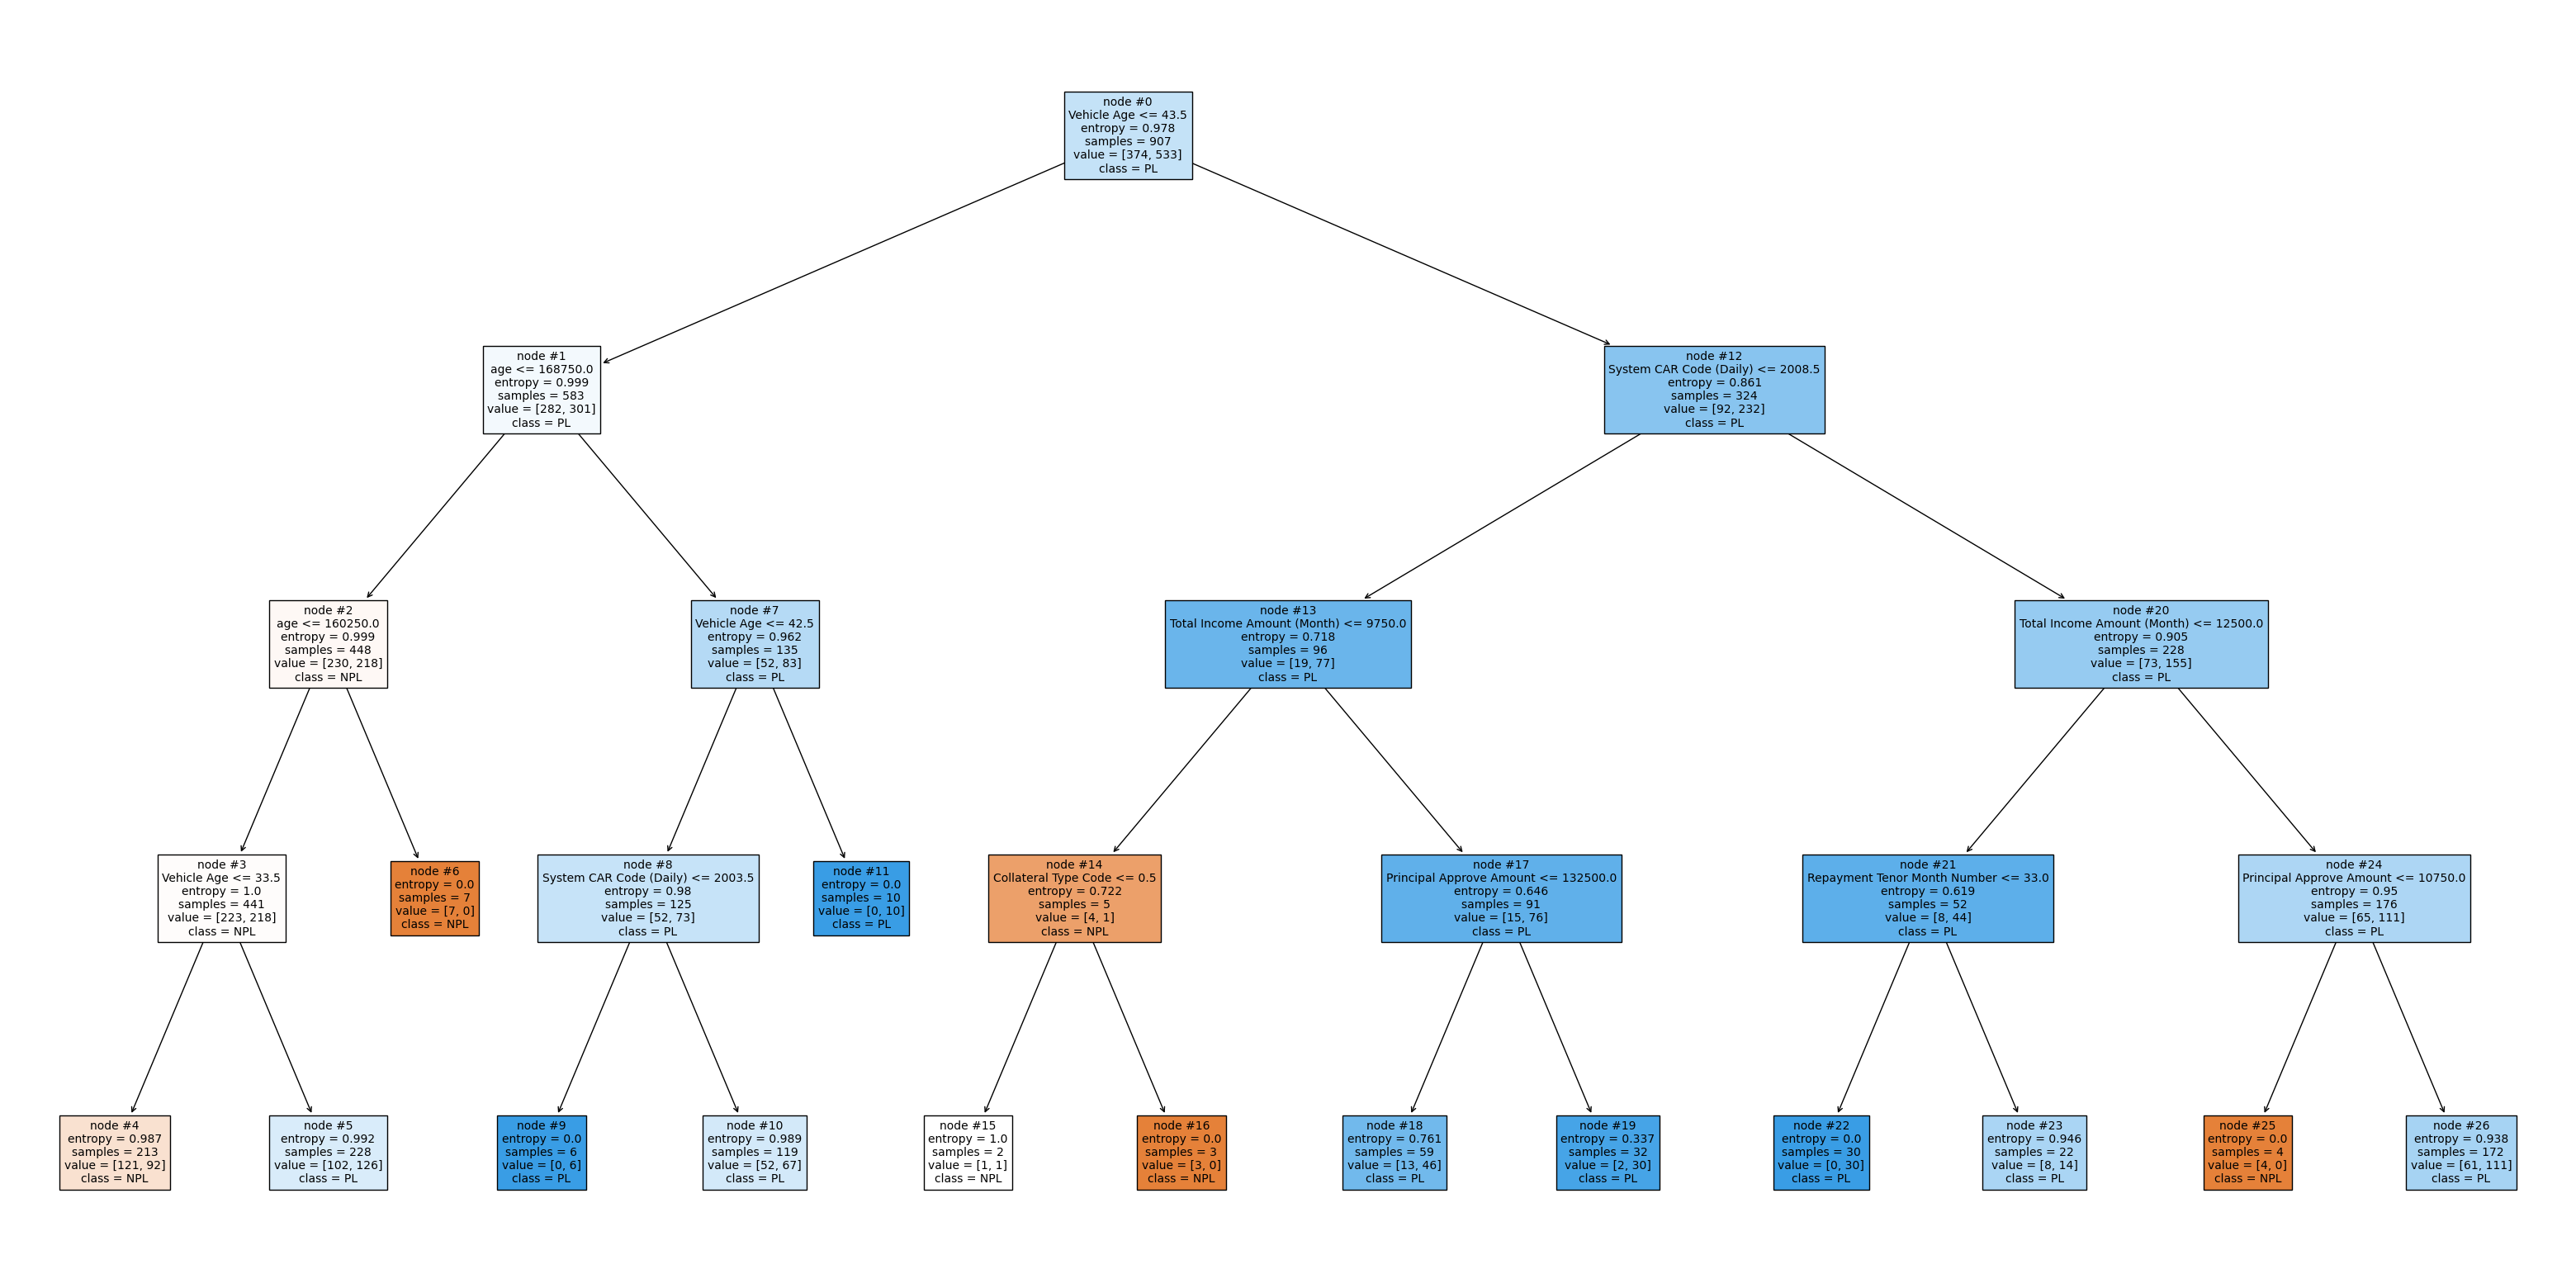

In [149]:
from sklearn import tree
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(classifier, 
                   feature_names=['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Evaluation Amount', 'System CAR Code (Daily)', 'age', 'Vehicle Age'],
                   class_names=['NPL','PL'],
                   filled=True,node_ids=True, fontsize=10)

In [150]:
#pip install graphviz

In [151]:
import graphviz

In [152]:
# dot_data = tree.export_graphviz(classifier, out_file=None,
#                                 feature_names=['Principal Approve Amount', 'Principal Amount',
#        'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
#        'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
#        'Vehicle Model', 'Vehicle Release Year', 'System CAR Code (Daily)',
#        'age', 'Vehicle Age'],  
#                                 class_names=['NPL','PL'],
#                                 filled=True,node_ids=True, rounded=True,
#                                 special_characters=True)
# graph = graphviz.Source(dot_data)
# graph

In [153]:
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['Principal Approve Amount', 'Repayment Tenor Month Number', 'Gender', 'Occupation Description',
       'Total Income Amount (Month)', 'Collateral Type Code', 'Vehicle Brand',
       'Evaluation Amount', 'System CAR Code (Daily)', 'age', 'Vehicle Age'],  
                                class_names=['NPL','PL'],
                                filled=True,node_ids=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

ValueError: Length of feature_names, 11 does not match number of features, 12

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n',cm)

cr = classification_report(y_test, y_pred)
print('Classification report  \n',cr)

In [ ]:
#pip install plot_confusion_matrix

In [ ]:
#pip install plot_roc_curve

In [ ]:
#pip install metrics

In [ ]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, plot_roc_curve
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues', values_format='d')

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.grid()